## Vancouver Crime Data

### Introduction

With approximately 50,000 immigrants who moved to Vancouver from 2019 to 2020 alone (Jeudy, 2021), it can be said that Vancouver is quite a popular location of interest for immigration. There is a possibility, however, that those who are looking into moving to Vancouver are not aware of the different levels of safety of the neighborhoods in Vancouver. Thus, this report serves as a way for prospective immigrants who know little to nothing about Vancouver an idea of possible neighborhoods they may reside in or work. 

Applying the techniques and concepts learned in STAT 201, this project aims to discover and analyze the relationship between the number of serious crimes committed in 2 different neighborhoods: West End and West Point Grey.

The two neighborhoods of interest for this report are West End and West Point Grey because these two contrast in population density and income level.  More specifically, West End is a relatively densely populated neighborhood with a lower average income level, while West Point Grey is less densely populated but with a higher average income level (City of Vancouver, 2017). With these two choices, we wanted to see whether income and population density have any effect on whether or not a neighbourhood is safe. For the purpose of this report, a safe neighborhood is considered one with relatively low quantities of serious crimes. Examples of serious crime include homicide, vehicle collision with fatality, and the like.

### Research Question and Parameter

After thorough research on the crime statistics in Vancouver, the primary question that we aim to answer is **if the population density and income levels of a neighborhood in Vancouver have an effect on the crime rate.** Furthermore, our main parameters of interest are the proportion of serious crimes committed in each neighborhood and the average crime rate (we have 2 location parameters since having a scale parameter did not make sense here) 


### Hypotheses

**_Null Hypothesis_**: Population density and income level have no effect on safety and the amount of crime in a Vancouver neighborhood.<br>
**_Alternative Hypothesis_**: Less populated neighborhoods with higher income have a lower proportion of serious crimes and lower average crime annually than densely populated neighborhoods with lower income.


### Chosen Dataset

To discover the safety of the different neighborhoods in Vancouver, we will analyze the crime statistics of the neighborhoods through a dataset obtained from the Vancouver Police Department, containing 814,697 observations of crimes committed from 2011 to 2021.

## Methods and Results


Loading data and required packages

In [3]:
# installing required packages
install.packages("skimr")
install.packages("GGally")
install.packages("tidyverse")
install.packages("repr")
install.packages("tidymodels")
install.packages("ggplot2")
install.packages("RCurl")
install.packages("see")
install.packages("dplyr")
install.packages("janitor")
install.packages("infer")


The downloaded binary packages are in
	/var/folders/_k/lgvt5y7s27s5sjx50fwzd3jr0000gn/T//Rtmp9JngBk/downloaded_packages

The downloaded binary packages are in
	/var/folders/_k/lgvt5y7s27s5sjx50fwzd3jr0000gn/T//Rtmp9JngBk/downloaded_packages

The downloaded binary packages are in
	/var/folders/_k/lgvt5y7s27s5sjx50fwzd3jr0000gn/T//Rtmp9JngBk/downloaded_packages

The downloaded binary packages are in
	/var/folders/_k/lgvt5y7s27s5sjx50fwzd3jr0000gn/T//Rtmp9JngBk/downloaded_packages

The downloaded binary packages are in
	/var/folders/_k/lgvt5y7s27s5sjx50fwzd3jr0000gn/T//Rtmp9JngBk/downloaded_packages

The downloaded binary packages are in
	/var/folders/_k/lgvt5y7s27s5sjx50fwzd3jr0000gn/T//Rtmp9JngBk/downloaded_packages

The downloaded binary packages are in
	/var/folders/_k/lgvt5y7s27s5sjx50fwzd3jr0000gn/T//Rtmp9JngBk/downloaded_packages

The downloaded binary packages are in
	/var/folders/_k/lgvt5y7s27s5sjx50fwzd3jr0000gn/T//Rtmp9JngBk/downloaded_packages

The downloaded binary packages 

In [4]:
# installing libraries

library(tidyverse)
library(repr)
library(GGally)
library(skimr)
library(ggplot2)
library(RCurl)
library(dplyr)
library(see)
library(janitor)
library(infer)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


Attaching package: ‘RCurl’


The following object is masked from ‘package:tidyr’:

    complete



Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test




Loading Our Data

In [5]:
# reading file from github

url <- "https://raw.githubusercontent.com/Utsav02/VancouverCrimeSTAT201/main/crimedata_csv_AllNeighbourhoods_AllYears.csv"

vancouver_crime <- read.csv(url)
head(vancouver_crime)


,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
,<chr>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>
1,Theft of Vehicle,2003,9,24,21,0,29XX RUPERT ST,Renfrew-Collingwood,497551.6,5456205
2,Theft of Vehicle,2004,4,30,19,0,29XX RUPERT ST,Renfrew-Collingwood,497551.6,5456205
3,Theft of Vehicle,2006,12,11,23,0,29XX RUPERT ST,Renfrew-Collingwood,497551.6,5456205
4,Theft of Vehicle,2017,12,3,20,30,29XX SASAMAT ST,West Point Grey,484782.1,5456498
5,Theft of Vehicle,2004,8,26,0,0,29XX SE MARINE DR,Killarney,496545.8,5450538
6,Theft of Vehicle,2004,8,27,4,30,29XX SE MARINE DR,Killarney,496545.8,5450538


Tidying data according to our use

In [6]:
# not selecting 2022 as it is the present year
vancouver_crime <- vancouver_crime %>%
filter(YEAR != 2022) %>%
select(TYPE, YEAR, NEIGHBOURHOOD)

# crimes that do not have any neighbourhoods mentioned
vancouver_crime[vancouver_crime == ""] <- "Neighbourhood Missing"

head(vancouver_crime)

,TYPE,YEAR,NEIGHBOURHOOD
,<chr>,<int>,<chr>
1,Theft of Vehicle,2003,Renfrew-Collingwood
2,Theft of Vehicle,2004,Renfrew-Collingwood
3,Theft of Vehicle,2006,Renfrew-Collingwood
4,Theft of Vehicle,2017,West Point Grey
5,Theft of Vehicle,2004,Killarney
6,Theft of Vehicle,2004,Killarney


Data at a glace (Neighbourhoods and Type of Crime)

In [7]:
tidy_data <- vancouver_crime %>%
group_by(TYPE, NEIGHBOURHOOD) %>%
summarize(Count = n()) %>%
pivot_wider(names_from = TYPE, values_from = Count)

tidy_data

`summarise()` has grouped output by 'TYPE'. You can override using the
`.groups` argument.


NEIGHBOURHOOD,Break and Enter Commercial,Break and Enter Residential/Other,Homicide,Mischief,Offence Against a Person,Other Theft,Theft from Vehicle,Theft of Bicycle,Theft of Vehicle,Vehicle Collision or Pedestrian Struck (with Fatality),Vehicle Collision or Pedestrian Struck (with Injury)
<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
Arbutus Ridge,385,1981,3,1137,333,1501,2315,244,540,5,368
Central Business District,12411,4103,67,25002,20322,69745,66812,9168,4617,49,4040
Dunbar-Southlands,337,2211,1,1648,385,1233,3636,337,675,4,354
Fairview,4216,4150,4,4359,1844,13131,14832,4442,2237,15,1421
Grandview-Woodland,2741,5104,19,6415,5806,9451,9876,1888,3589,10,1483
Hastings-Sunrise,1144,3737,14,3910,2116,4734,8027,545,2789,19,1553
Kensington-Cedar Cottage,1575,4715,18,4920,3346,8109,9779,1225,3239,19,1895
Kerrisdale,438,2258,2,1302,354,1532,3491,255,618,9,568
Killarney,457,2351,12,2147,1194,1933,4942,274,1451,17,719


Extracting data of West End and West Point Grey

In [8]:
# two neighbourhoods we are comparing

westpoint_crime <- vancouver_crime %>%
filter(NEIGHBOURHOOD == "West Point Grey")

westend_crime <- vancouver_crime %>%
filter(NEIGHBOURHOOD == "West End")

`summarise()` has grouped output by 'YEAR'. You can override using the
`.groups` argument.


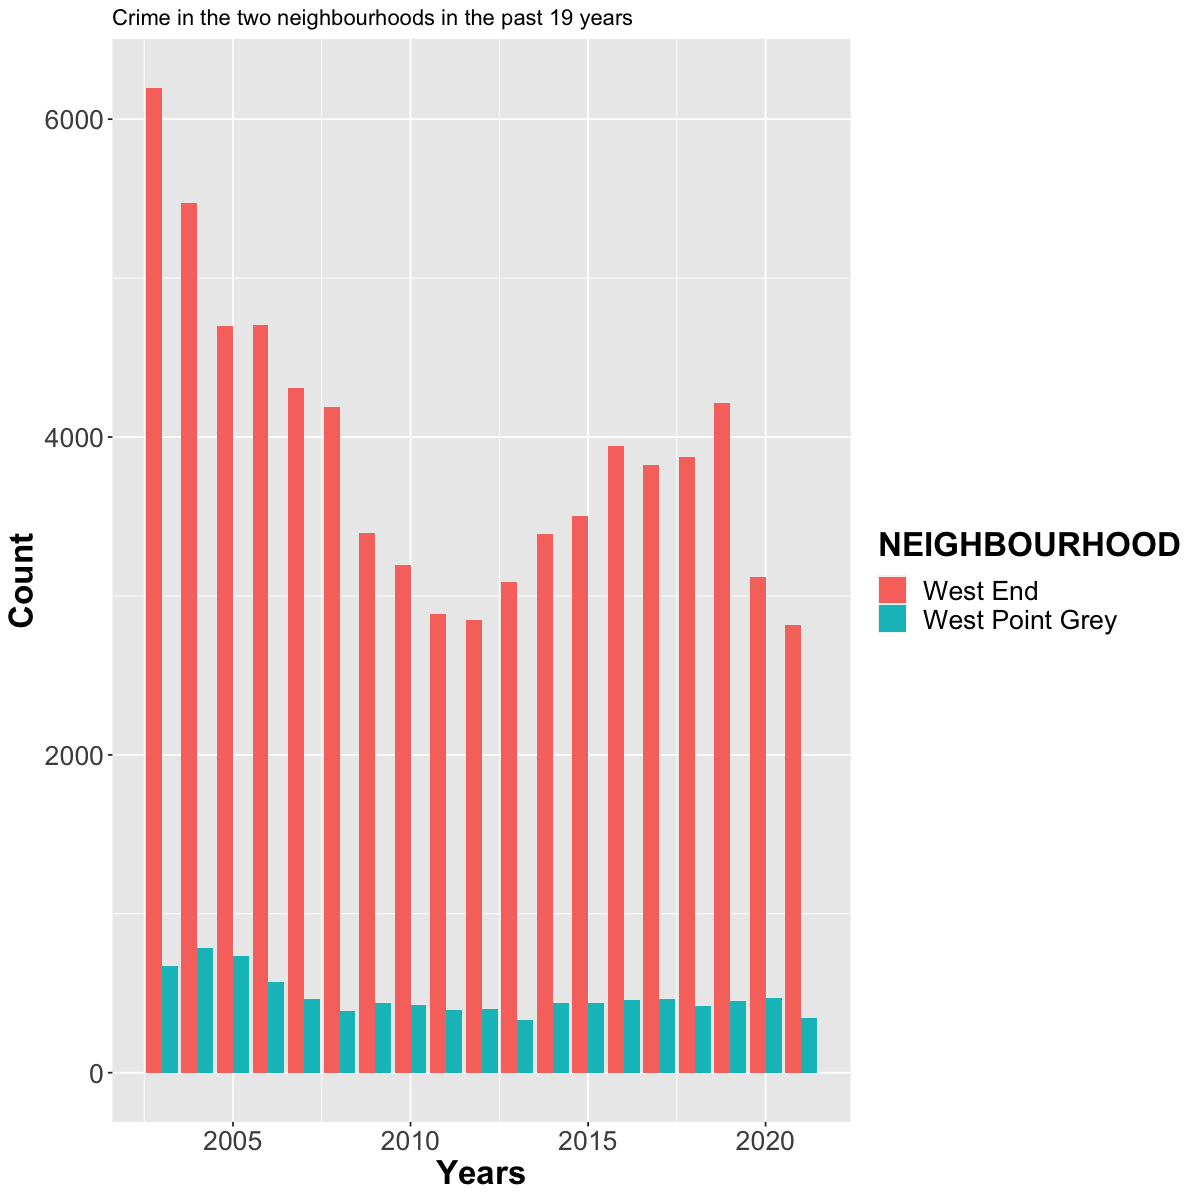

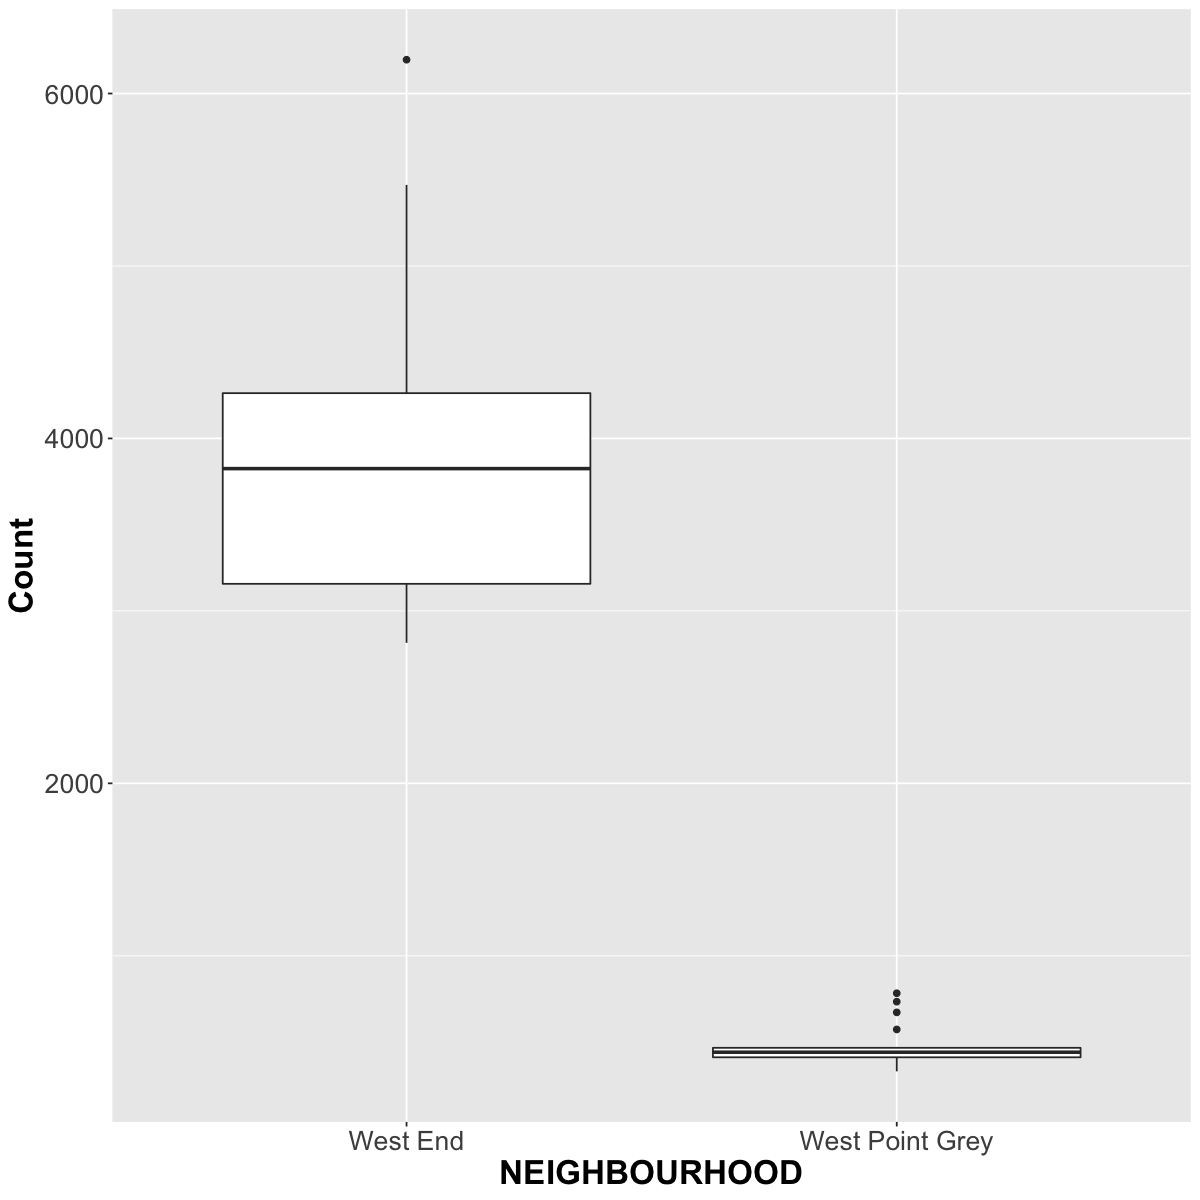

In [11]:
# comparing the two neighbourhoods
compare_crime <- vancouver_crime %>%
filter(NEIGHBOURHOOD == "West End" | NEIGHBOURHOOD == "West Point Grey") %>%
group_by(YEAR, NEIGHBOURHOOD) %>%
summarise(Count = n())

options(repr.plot.height = 10, repr.plot.width = 10)
compare_plot <- compare_crime %>%
ggplot(aes(x = YEAR, y = Count, fill = NEIGHBOURHOOD)) +
geom_bar(stat = "identity", position = "dodge") +
labs(x = "Years", title = "Crime in the two neighbourhoods in the past 19 years") +
theme(axis.text=element_text(size=16),
     axis.title=element_text(size=20,face="bold"),
     legend.text = element_text(size = 16),
     legend.title = element_text(size = 20, face = "bold"))

compare_plot

compare_box <- compare_crime %>%
ggplot(aes(x = NEIGHBOURHOOD, y = Count))+
geom_boxplot() +
theme(axis.text=element_text(size=16),
     axis.title=element_text(size=20,face="bold"))

compare_box

Here, we utilize bar graph and boxplot to compare the crime rates of the different neighbourhoods. The x-axis represents the two neighbourhoods, whereas the y-axis represents the instances of crimes in the respective neightbourhoods.

It is evident from the plots above, that West Point Grey has a significantly lower level of crime than West End. West End has an average of 380 crimes annually, while West Point Grey has about 80.

Violent Crimes:<br>
We thought to compare the number of violent crimes ("Homicide", "Vehicle Collision or Pedestrian Struck (with Fatality)" and "Offence Against a Person") and the proportion they make for each neighbourhood.

`summarise()` has grouped output by 'YEAR'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'YEAR'. You can override using the
`.groups` argument.


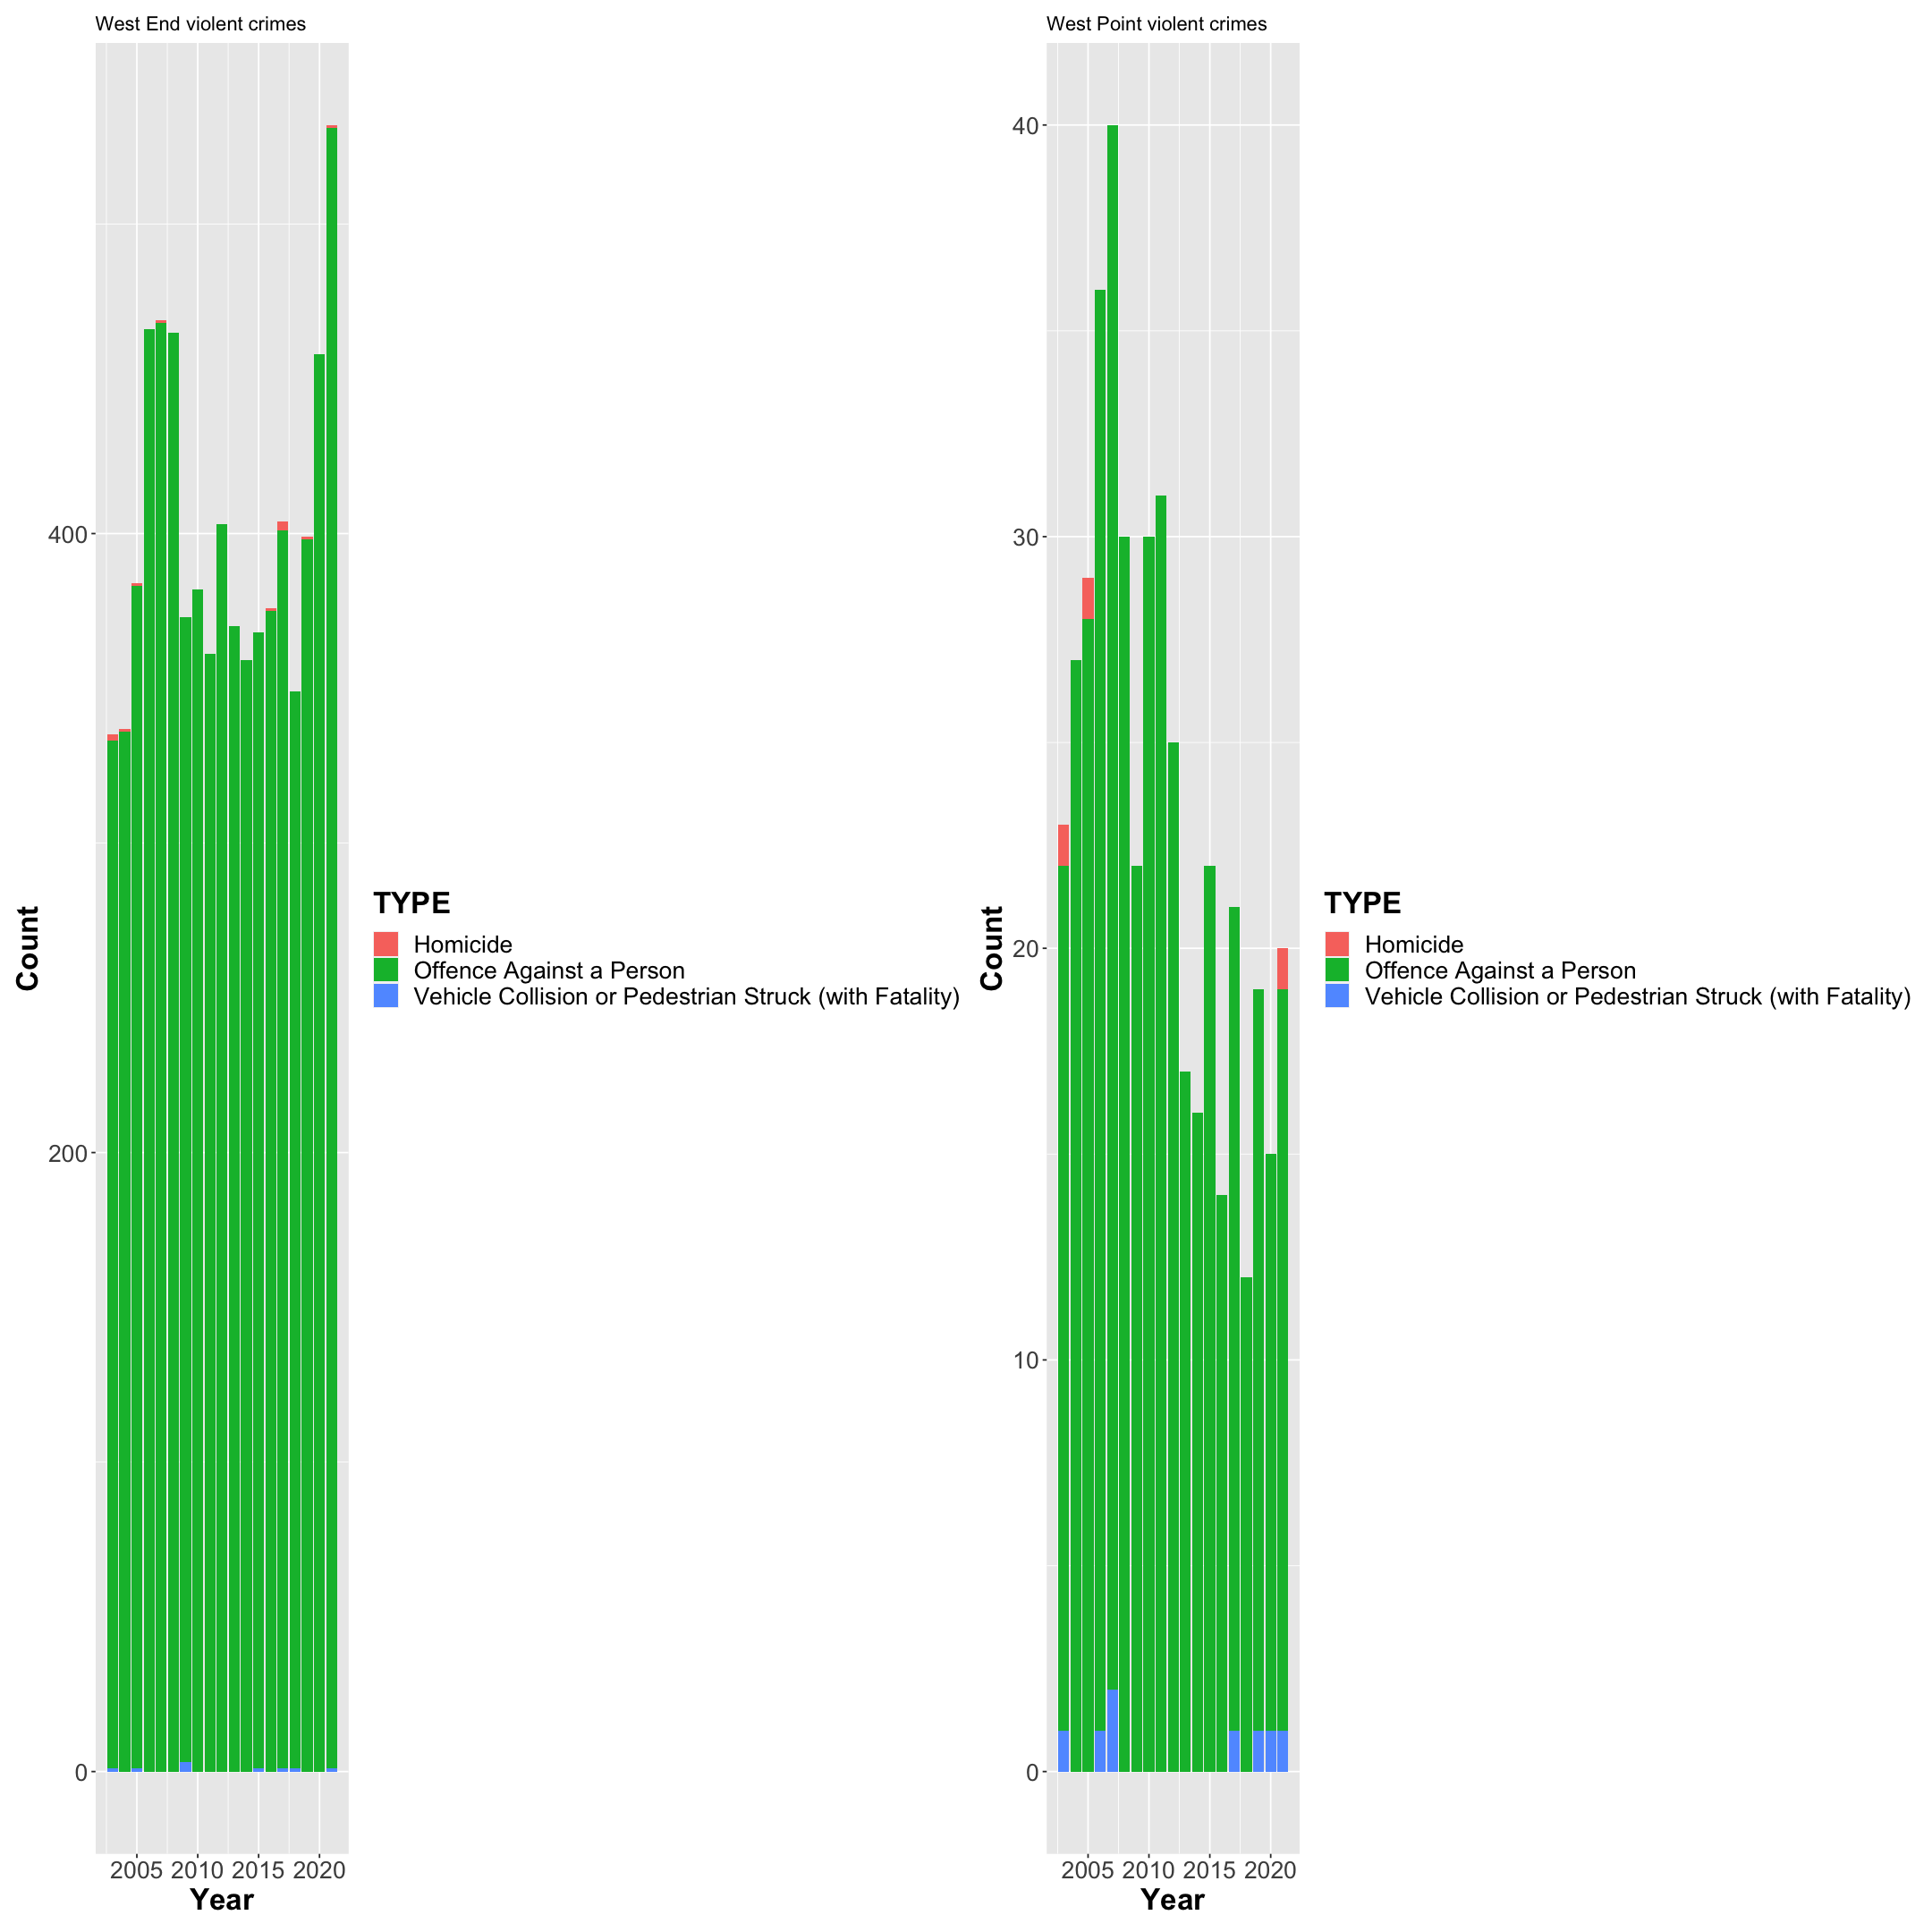

In [17]:

violent_crimes <- vancouver_crime %>%
filter(TYPE == "Homicide" | TYPE == "Offence Against a Person" | TYPE == "Vehicle Collision or Pedestrian Struck (with Fatality)")


westend_violent <- violent_crimes %>%
filter(NEIGHBOURHOOD == "West End")

westpoint_violent <- violent_crimes %>%
filter(NEIGHBOURHOOD == "West Point Grey")


westend_violent_plot <- westend_violent %>%
group_by(YEAR, TYPE) %>%
summarise(Count = n()) %>%
ggplot(aes(x = YEAR, y = Count, fill = TYPE)) +
geom_bar(stat = "identity") + 
labs(x = "Year", title = "West End violent crimes") +
theme(axis.text=element_text(size=16),
     axis.title=element_text(size=20,face="bold"),
     legend.text = element_text(size = 16),
     legend.title = element_text(size = 20, face = "bold"))

westpoint_violent_plot <- westpoint_violent %>%
group_by(YEAR, TYPE) %>%
summarise(Count = n()) %>%
ggplot(aes(x = YEAR, y = Count, fill = TYPE)) +
geom_bar(stat = "identity")+ 
labs(x = "Year", title = "West Point violent crimes") +
theme(axis.text=element_text(size=16),
     axis.title=element_text(size=20,face="bold"),
     legend.text = element_text(size = 16),
     legend.title = element_text(size = 20, face = "bold"))

options(repr.plot.width = 18, repr.plot.height= 18)
plots(westend_violent_plot, westpoint_violent_plot)


Here, we once again utilize bar graphs to compare the two neighbourhoods. We have the year on x-axis and the count (instances of crimes) on the y-axis. The bar graph is stacked and coloured according to the different categories of crime (homicide, offence against a person, and vehicle collision).

 From the above bar graph, we see that West Point Grey has a lower proportion of 'serious crimes' than West End. In West End, we see serious crimes reaching as high as 500 annually, where the highest in West Point is only 40.

Bootstrapping to find mean crimes in a year for both neighbourhoods

`summarise()` has grouped output by 'NEIGHBOURHOOD'. You can override using the
`.groups` argument.
Setting `type = "bootstrap"` in `generate()`.

Setting `type = "bootstrap"` in `generate()`.



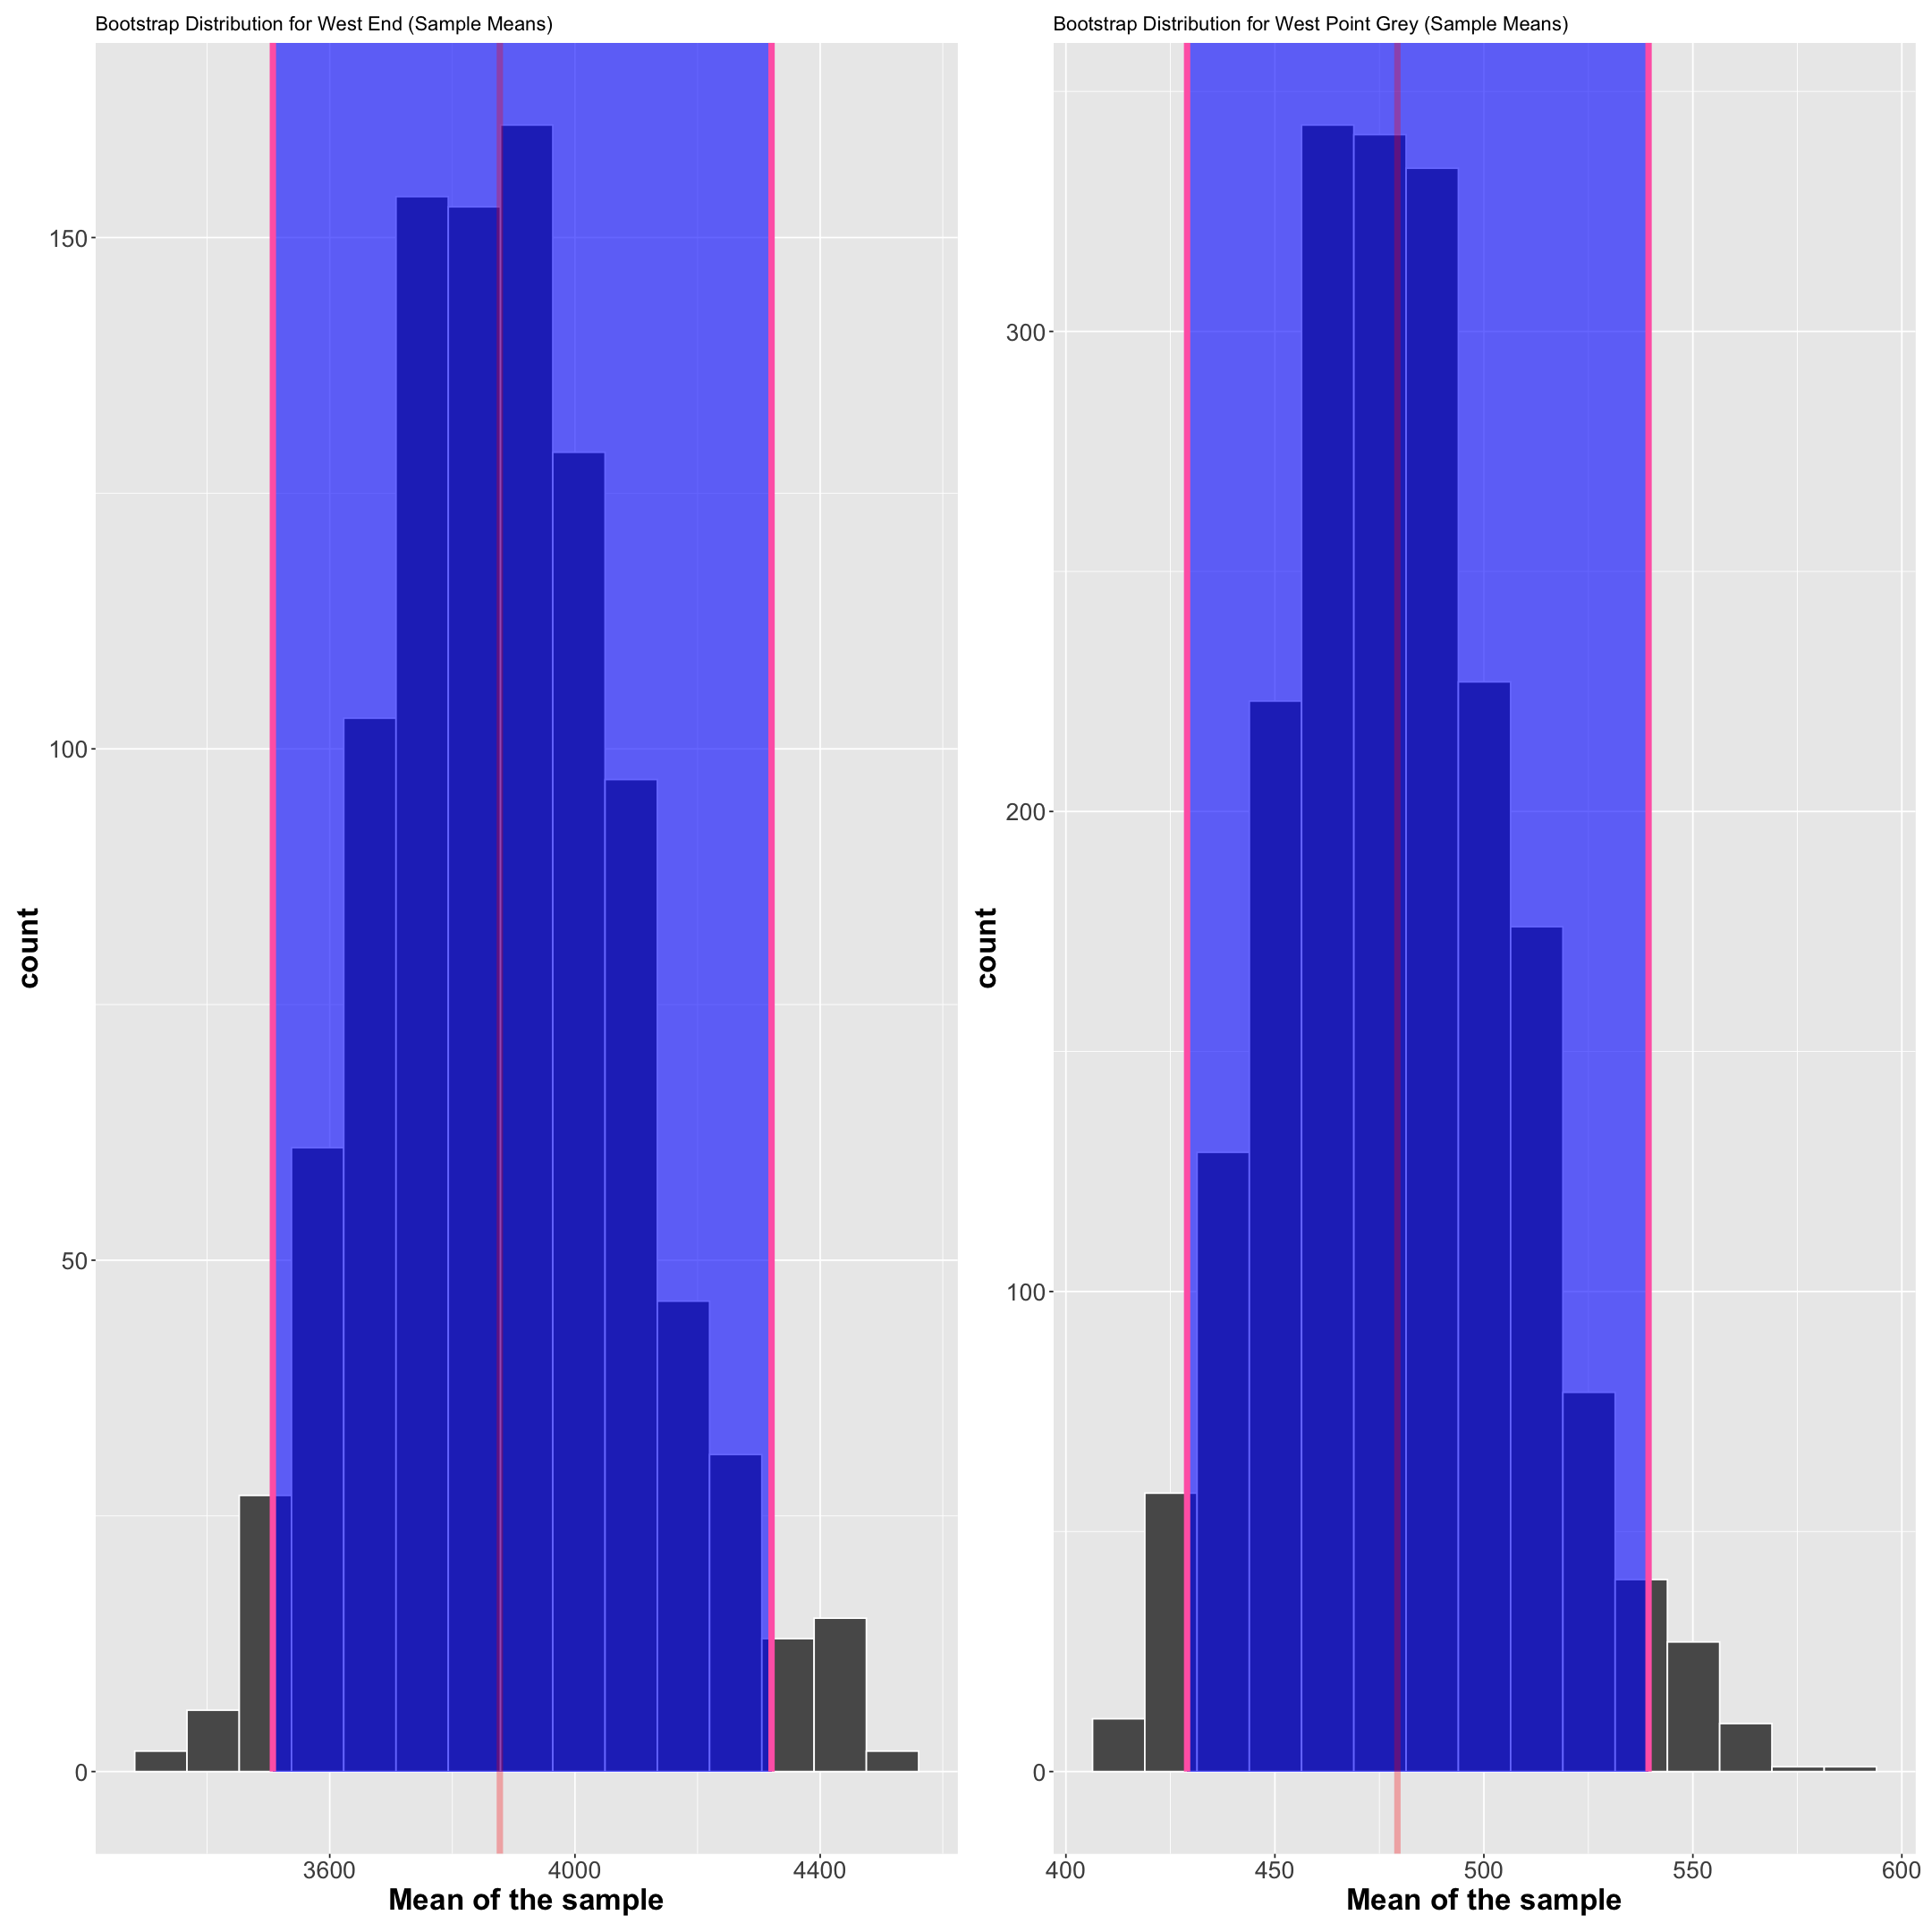

In [18]:
neighbourhood_year_grouped <- vancouver_crime %>%
group_by(NEIGHBOURHOOD, YEAR) %>%
summarize(Count = n()) 

westend_bootstrap_sample <- neighbourhood_year_grouped %>%
filter(NEIGHBOURHOOD == "West End") %>%
specify(response = Count) %>%
generate(reps = 1000) %>%
calculate(stat = "mean") 

westend <- neighbourhood_year_grouped %>%
filter(NEIGHBOURHOOD == "West End")

westend_mean <- mean(westend$Count)

westend_percentile_ci <- westend_bootstrap_sample %>%
get_confidence_interval(level = 0.95, type = "percentile")

westend_bootstrap_sample_plot <- visualise(westend_bootstrap_sample)+
shade_ci(endpoints = westend_percentile_ci, color = "hotpink", fill = "blue") +
geom_vline(xintercept = westend_mean, color = "red", alpha = .3, lwd = 2) +
labs(title = "Bootstrap Distribution for West End (Sample Means)", x = "Mean of the sample") +
theme(axis.text=element_text(size=16),
     axis.title=element_text(size=20,face="bold"))



westpoint_bootstrap_sample <- neighbourhood_year_grouped %>%
filter(NEIGHBOURHOOD == "West Point Grey") %>%
specify(response = Count) %>%
generate(reps = 2000) %>%
calculate(stat = "mean") 

westpoint <- neighbourhood_year_grouped %>%
filter(NEIGHBOURHOOD == "West Point Grey")


westpoint_mean <-mean(westpoint$Count)

westpoint_percentile_ci <- westpoint_bootstrap_sample %>%
get_confidence_interval(level = 0.95, type = "percentile")

westpoint_bootstrap_sample_plot <- visualise(westpoint_bootstrap_sample) +
shade_ci(endpoints = westpoint_percentile_ci, color = "hotpink", fill = "blue") +
geom_vline(xintercept = westpoint_mean, color = "red", alpha = .3, lwd = 2) +
labs(title = "Bootstrap Distribution for West Point Grey (Sample Means)", x = "Mean of the sample") +
theme(axis.text=element_text(size=16),
     axis.title=element_text(size=20,face="bold"))

plots(westend_bootstrap_sample_plot,westpoint_bootstrap_sample_plot)

This side-by-side histogram shows the distribution of the bootstrapping samples of West Point Grey and West End.

First we obtained 1000 bootstrapping samples for West End and West Point Grey separately. Then, we plotted the distribution of the instances of crimes as a histogram for both the neightbourhoods separately. A red line marking the mean of the sample and 95% confidence intervals was also added to the plot

We can see that the mean of West End is around 3900, while the mean for West Point Grey is 475. 95% confidence interval for West End is between 3500 and 4250. 95% confidence interval for West Point Grey is between 440 and 540.

We realize that bootstrapping may not always be accurate (the samples taken may not be representative of the entire population). That is why we also include the 95% confidence interval. 95% confidence interval means that 95% of our estimated means will fall within this range. 

This plot, with its confidence intervals, highlights the huge disparity in crimes rates between the two neighbourhoods.

The table below will help us summarize our results.

In [20]:
table_data_hyp_1 <- rbind(
    c("", "WestEnd", "WestPoint"),
    c("Mean number of Crimes per year", round(westend_mean, 0), round(westpoint_mean, 0))
    
)

table_data_hyp_1

,WestEnd,WestPoint
Mean number of Crimes per year,3877,479


Bootstrapping to find proportions of violent crims for each neighbourhood

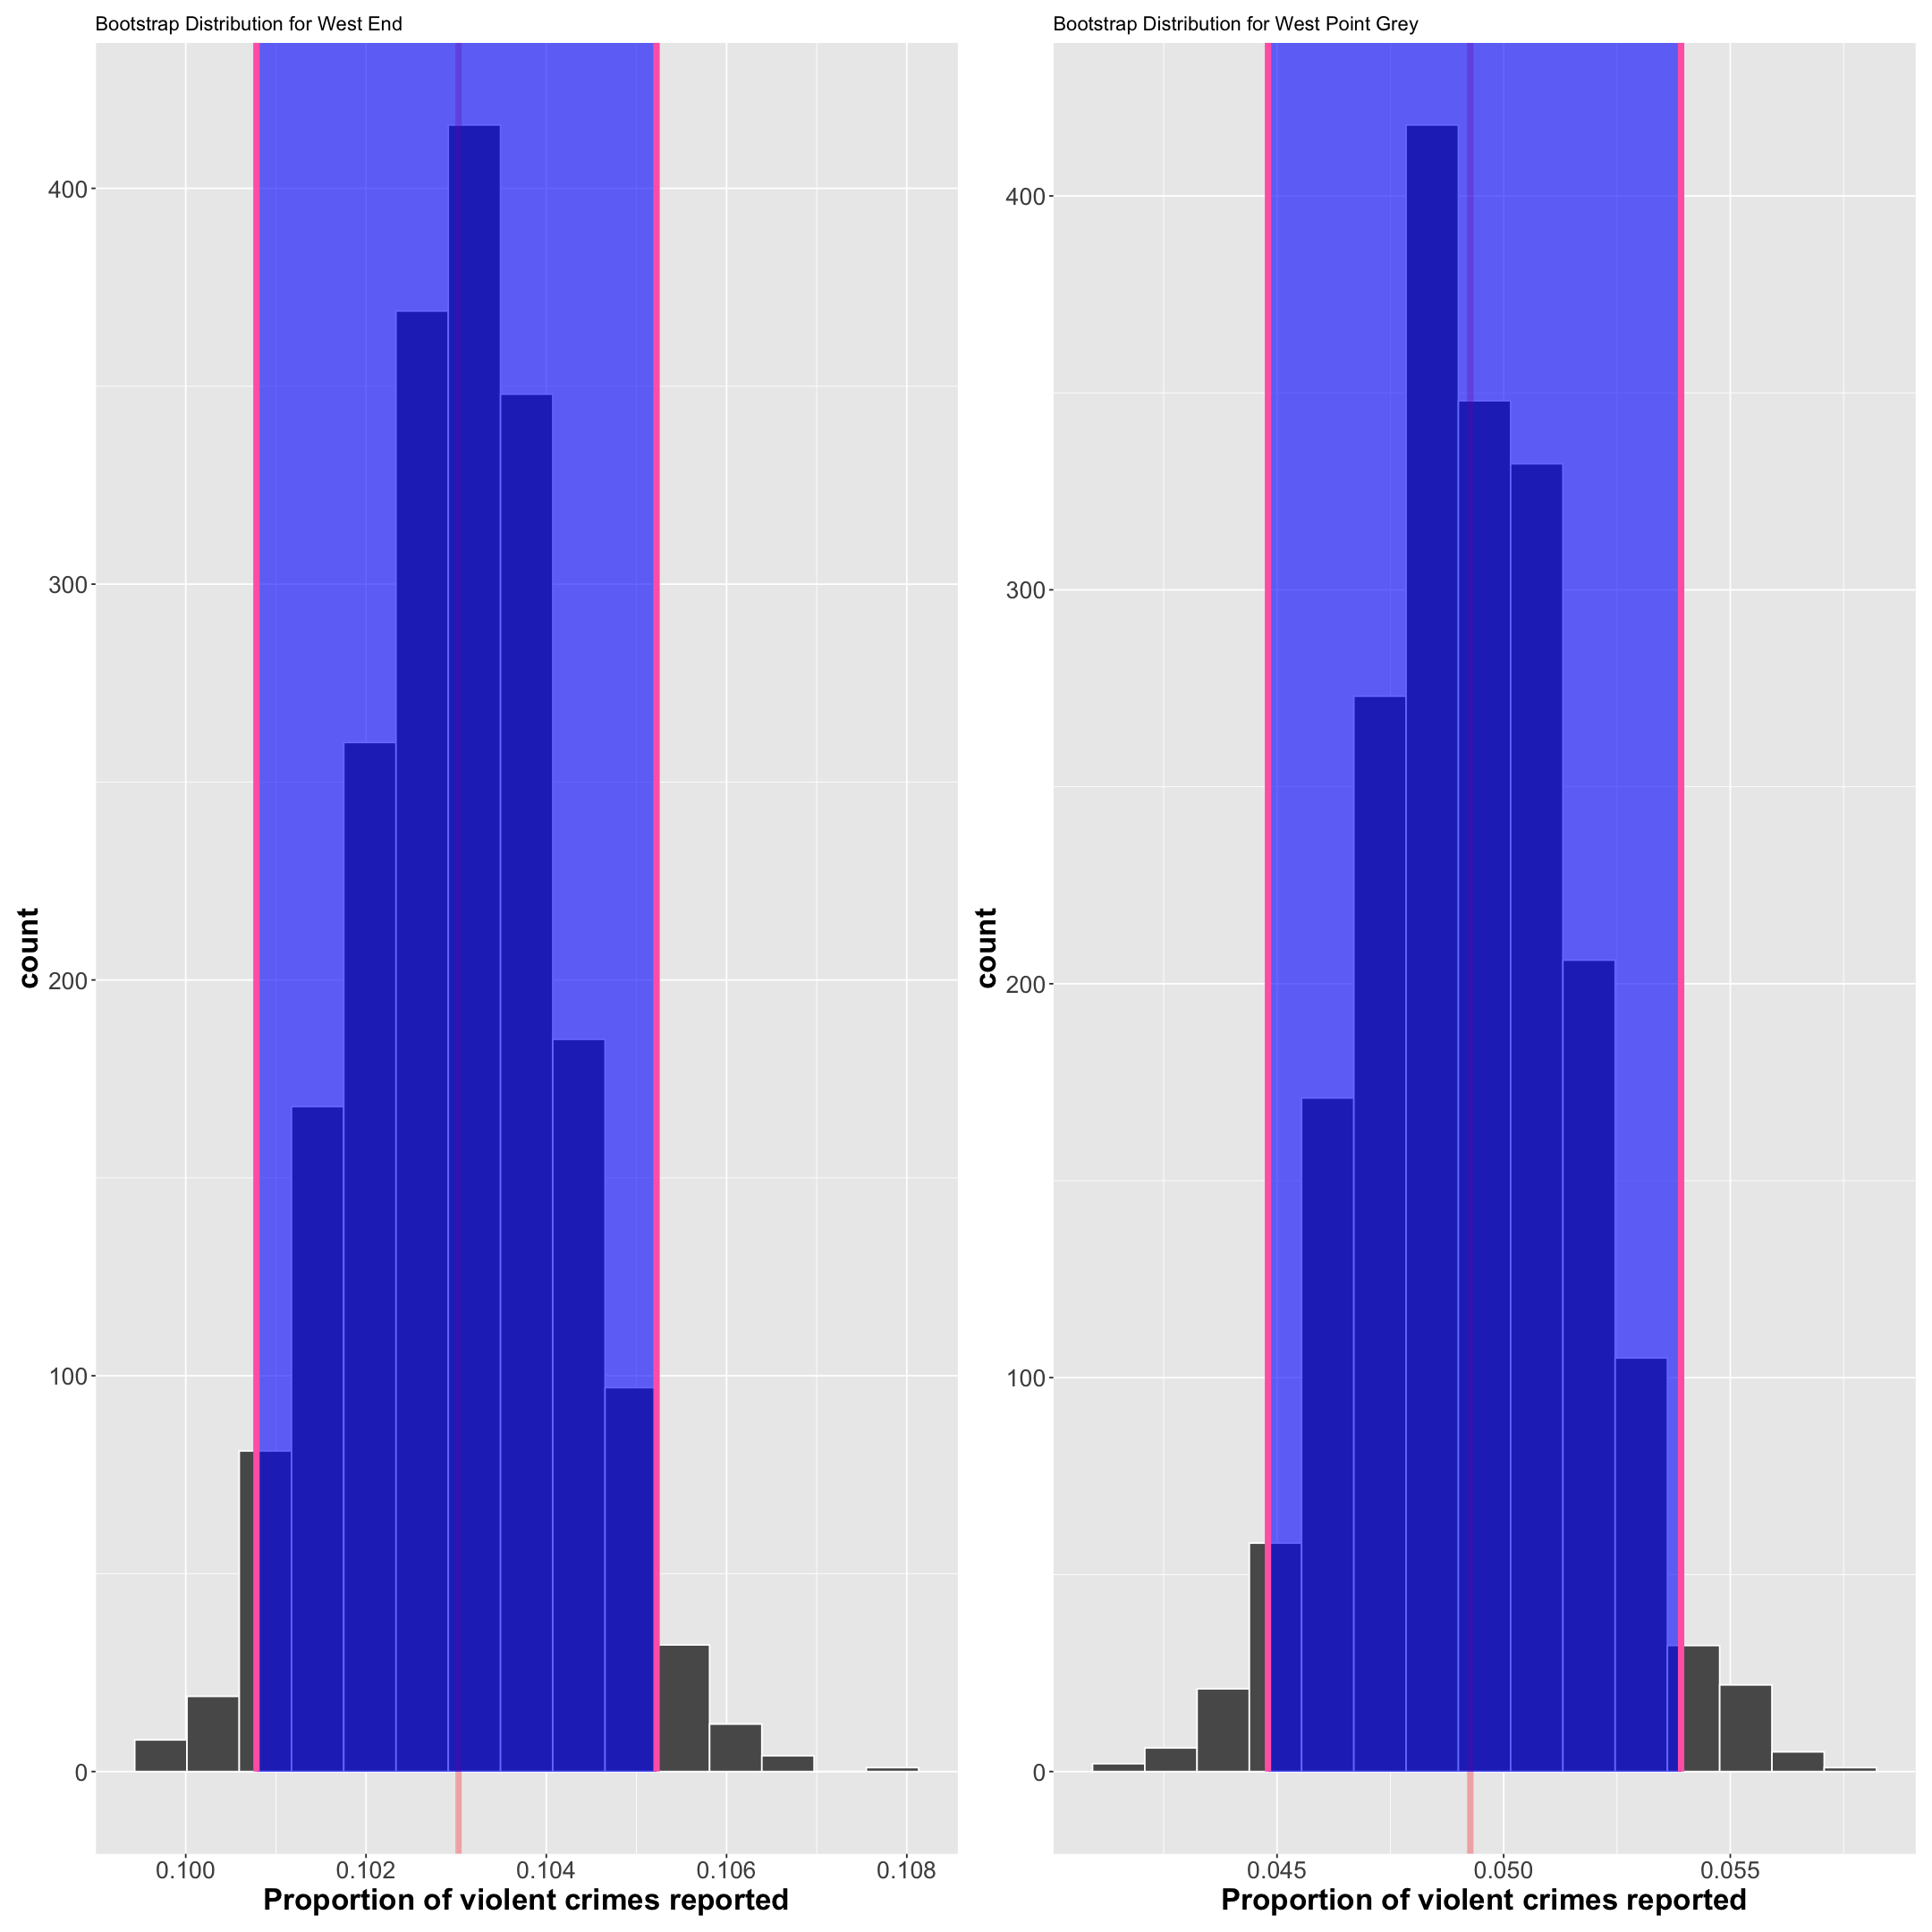

In [23]:
westpoint_crime <- westpoint_crime %>%
mutate(ViolentCrime = if_else(TYPE == "Homicide" | TYPE == "Offence Against a Person" | TYPE == "Vehicle Collision or Pedestrian Struck (with Fatality)", "YES", "NO"))

westend_crime <- westend_crime %>%
mutate(ViolentCrime = if_else(TYPE == "Homicide" | TYPE == "Offence Against a Person" | TYPE == "Vehicle Collision or Pedestrian Struck (with Fatality)", "YES", "NO"))

westpoint_violent_sample <-  westpoint_crime %>%
specify(response = ViolentCrime, success = "YES") %>%
generate(type = "bootstrap", reps = 2000) %>% 
calculate(stat = "prop") 

westpoint_violent_sample_mean <- mean(westpoint_violent_sample$stat)
westpoint_percentile_ci <- westpoint_violent_sample %>%
get_confidence_interval(level = 0.95, type = "percentile")


westpoint_violent_sample_plot <- visualise(westpoint_violent_sample)+
geom_vline(xintercept = westpoint_violent_sample_mean, color = "red", alpha = .3, lwd = 2) +
shade_ci(endpoints = westpoint_percentile_ci, color = "hotpink", fill = "blue") +
labs(title = "Bootstrap Distribution for West Point Grey", x = "Proportion of violent crimes reported") +
theme(axis.text=element_text(size=16),
     axis.title=element_text(size=20,face="bold"))



westend_violent_sample <-  westend_crime %>%
specify(response = ViolentCrime, success = "YES") %>%
generate(type = "bootstrap", reps = 2000) %>% 
calculate(stat = "prop")

westend_violent_sample_mean <- mean(westend_violent_sample$stat)

westend_percentile_ci <- westend_violent_sample %>%
get_confidence_interval(level = 0.95, type = "percentile")

westend_violent_sample_plot <- visualise(westend_violent_sample) +
geom_vline(xintercept = westend_violent_sample_mean, color = "red", alpha = .3, lwd = 2) +
shade_ci(endpoints = westend_percentile_ci, color = "hotpink", fill = "blue") +
labs(title = "Bootstrap Distribution for West End", x = "Proportion of violent crimes reported") +
theme(axis.text=element_text(size=16),
     axis.title=element_text(size=20,face="bold"))


plots(westend_violent_sample_plot, westpoint_violent_sample_plot)



Here, we can see the bootstraped sampling distribution using a histogram.

After obtaining 1000 bootstrap samples, we plot the sampling distribution. We include 95% confidence intervals and a line marking the proportion of violent crimes of the sample to the plot


The proportion of violent crimes of West End is 0.103, whereas the proportion of violent crimes in West Point Grey is 0.04. 

We realize that bootstrapping may not always be accurate (the samples taken may not be representative of the entire population). That is why we also include the 95% confidence interval. 95% confidence interval means that 95% of our estimated proportions will fall within this range. 

This plot, with its confidence intervals, highlights the huge disparity in crimes rates between the two neighbourhoods.

The table below will help us summarize our results.

In [25]:
table_data_hyp_2 <- rbind(
    c("", "WestEnd", "WestPoint"),
    c("Proportion of Violent Crimes", round(westend_violent_sample_mean, 3), round(westpoint_violent_sample_mean, 3))
)

table_data_hyp_2

,WestEnd,WestPoint
Proportion of Violent Crimes,0.103,0.049


## Hypothesis testing

In [26]:
#1. mean crime per year of westend is greater than westpoint
#2. proportions of violent crime over total crime is greater for westend than westpoint

filtered <- neighbourhood_year_grouped %>%
filter(NEIGHBOURHOOD == "West End" | NEIGHBOURHOOD == "West Point Grey")

hyp1 <- filtered %>%
specify(Count~NEIGHBOURHOOD) %>%
hypothesise(null = "independence") %>%
generate(reps = 2000, type = "permute") %>%
calculate(stat = "diff in means", order = c("West End", "West Point Grey"))

head(hyp1)

replicate,stat
<int>,<dbl>
1,31.52632
2,-19.63158
3,728.57895
4,-521.31579
5,-333.94737
6,-451.00000


Warning message:
“Please be cautious in reporting a p-value of 0. This result is an approximation based on the number of `reps` chosen in the `generate()` step. See `?get_p_value()` for more information.”


p_value
<dbl>
0


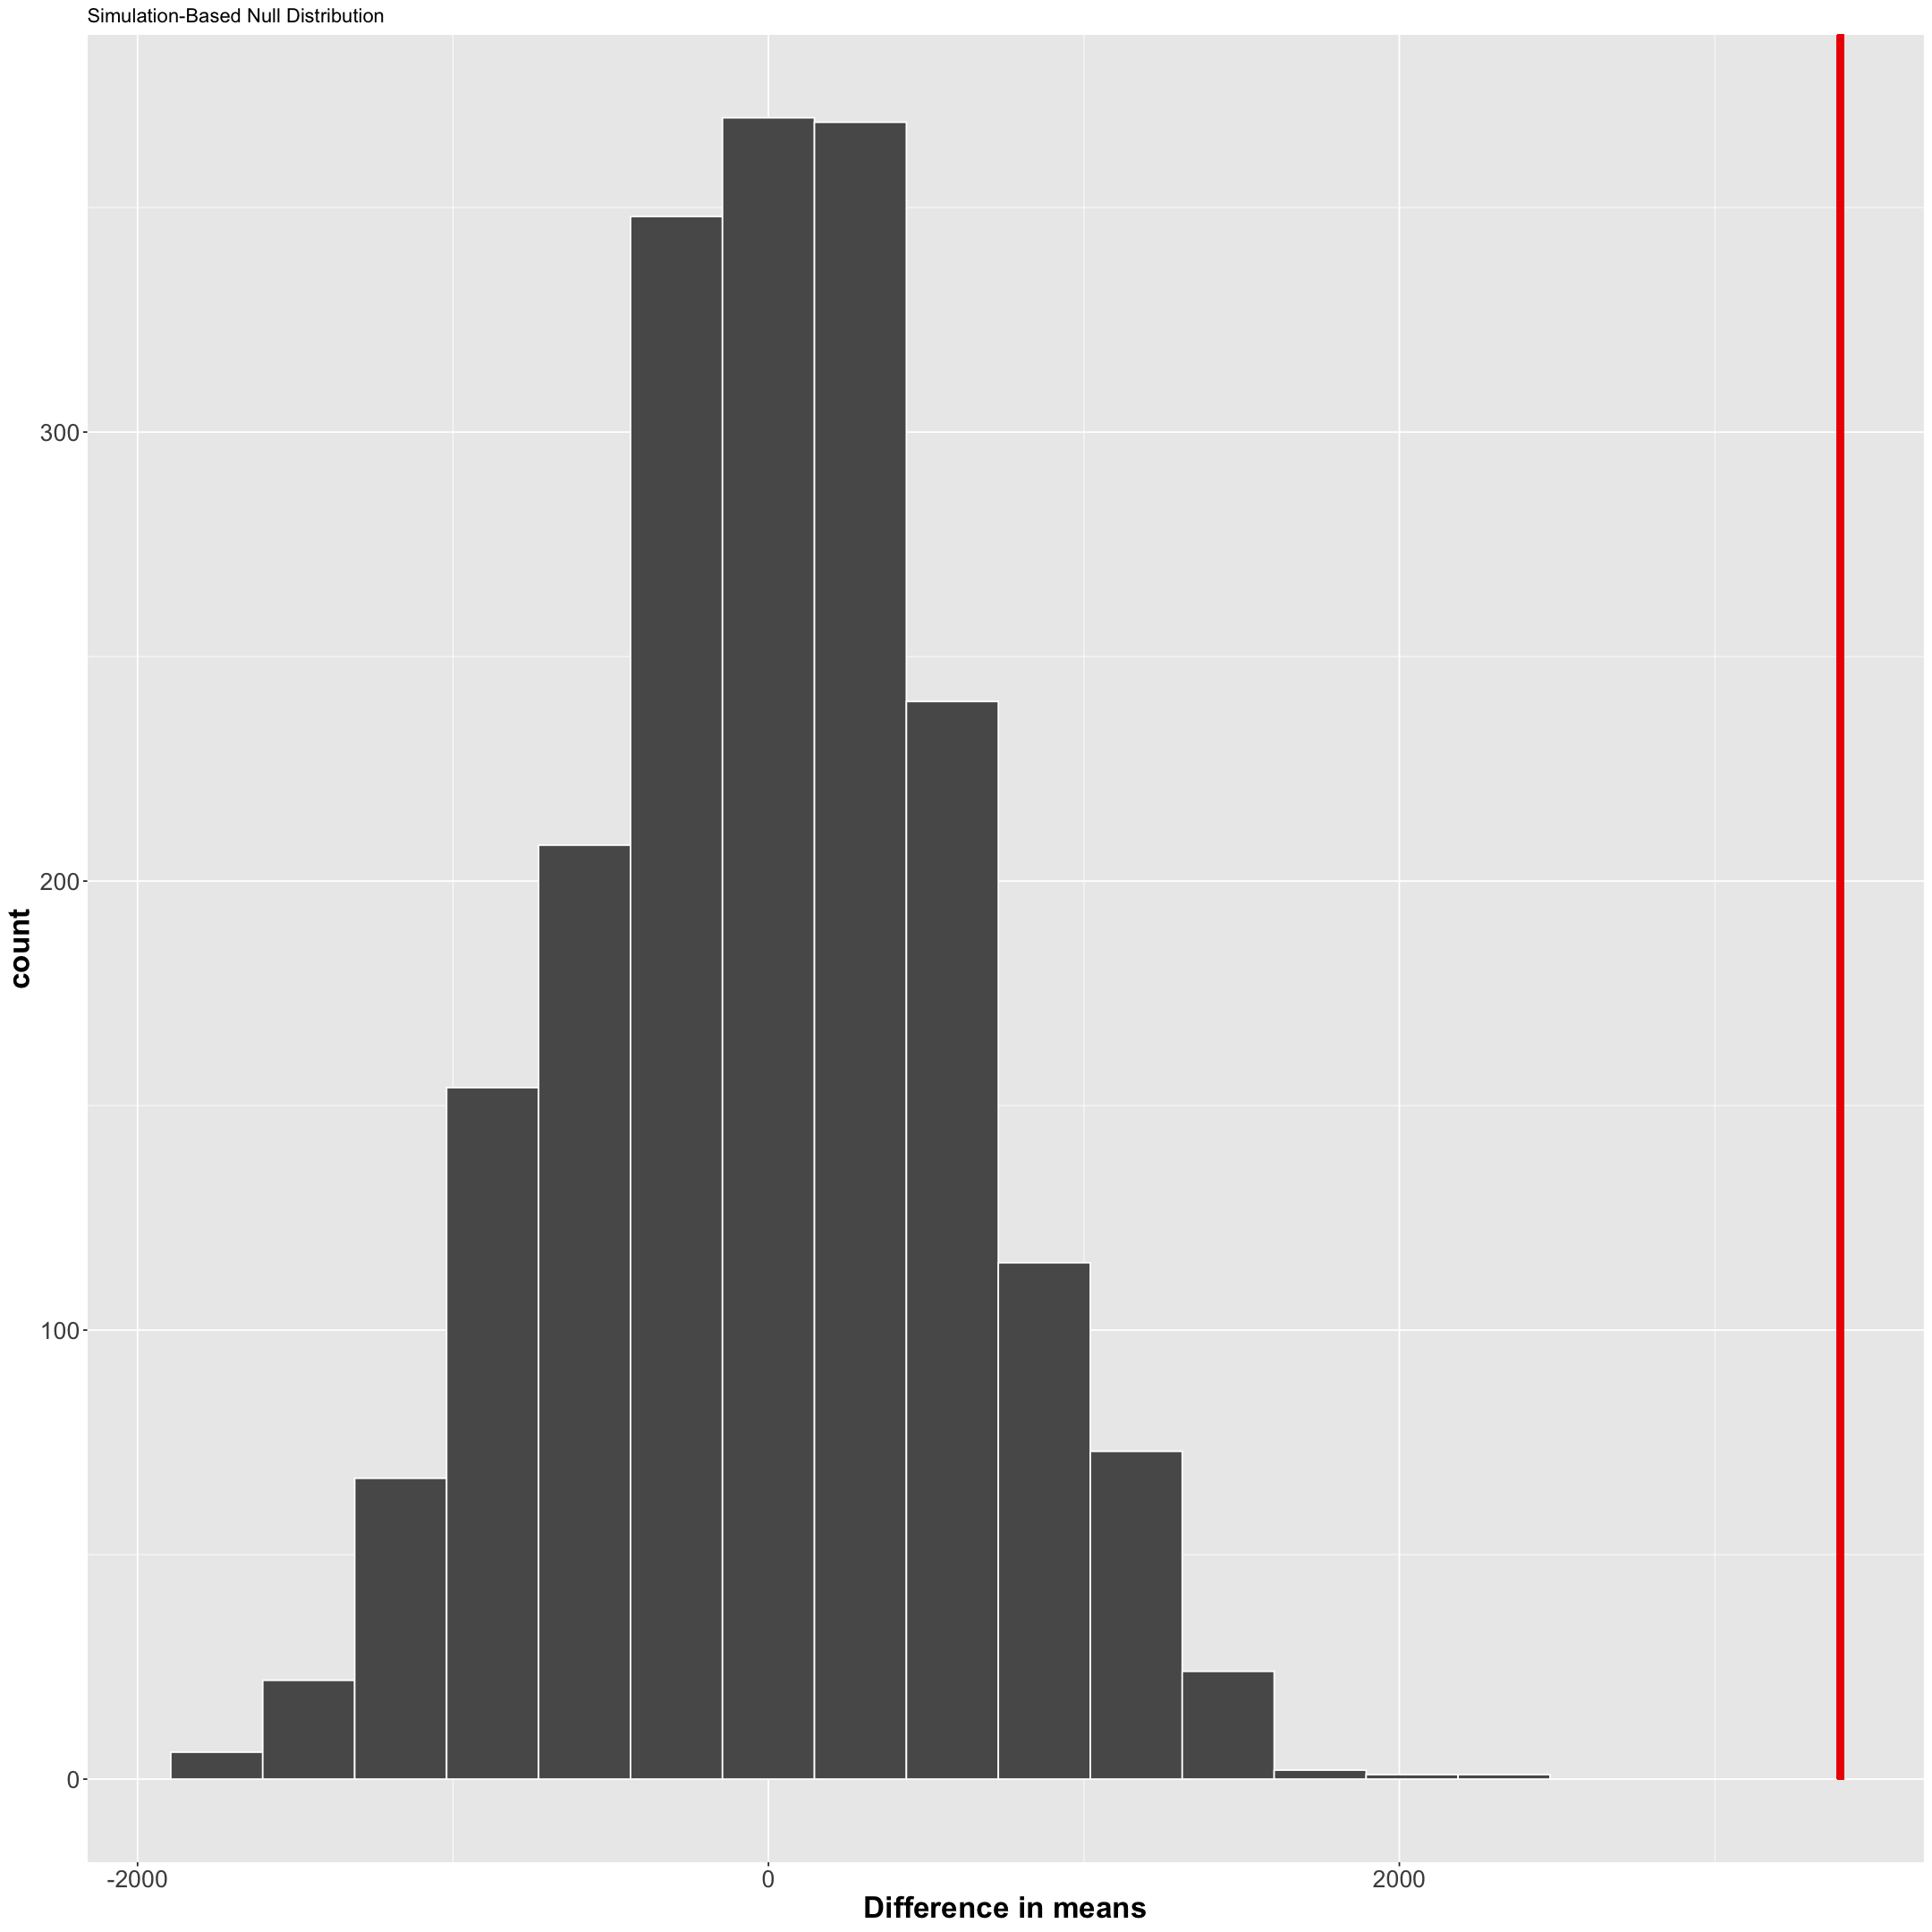

In [27]:
hyp1_plot <- hyp1 %>%
visualise() +
shade_p_value(obs_stat = round(westend_mean, 0) - round(westpoint_mean, 0), direction = "right") +
xlab("Difference in means") +
theme(axis.text=element_text(size=16),
     axis.title=element_text(size=20,face="bold"))

hyp1_plot

hyp1_pvalue <- hyp1 %>%
get_p_value(obs_stat = round(westend_mean, 0) - round(westpoint_mean, 0), direction = "right")
hyp1_pvalue

We see that we get a p-value of 0.0000001 (which RStudio approximates to 0). Since this value of p is so small, we reject the null hypothesis



## Discussion

<p>
As mentioned, the goal of this project is to determine if population density and income level have an influence on the crime rate in areas of Vancouver, specifically West End and West Point Grey neighbourhoods. A random sample, representative of the neighbourhoods, has been taken from each of the two filtered datasets. These samples were then subject to bootstrapping and asymptotics to retrieve the sample proportion and the sample mean of each neighbourhood. After the repeated sampling performed in the previous section, it is expected that 95% of the resulting confidence intervals have captured the true population parameters for both neighbourhoods. 

Looking at the project above, we cannot compare bootstrapping and asymptotics. While bootstrapping provides the statistics which can help us estimate the true population parameter, further testing—such as hypothesis testing—may be done to determine whether the data from the bootstrapped samples are statistically significant. Moreover, other sampling techniques may be experimented with to discover the possibility of having a more representative sample.
Thus, in any study, we must use both bootstrapping and asymptotics to thoroughly justify our claim.
</p>

<p>
From the above plots made using bootstrapping and hypothesis testing, we reject the null hypothesis. Thus, population and income disparity have a huge role in predicting the safety of a neighbourhood. Areas with higher population and lower income (like West End) tend to be more dangerous than areas with lower population and higher income (like West Point Grey) 
</p>
<p>
With this report, hopefully, individuals will be able to gain a sense of the safety levels in different areas in Vancouver, especially those who are new to the city. Moreover, individuals who plan to stay in Vancouver for a long period of time may take these results as a factor into their consideration when deciding on which area of Vancouver to reside or work in. Furthermore, future questions that may arise from this project may include, although not limited to, the following:<ul>
<li>How did the 2019 novel coronavirus affect the relationship among the population density, income level, and crime rate in Vancouver?</li>
<li>Which factor, whether population density or income level, has a stronger influence on the crime rate in Vancouver?</li></ul></p>


## References

<ol>
<li>VPD OPEN DATA. (2022). Retrieved 6 March 2022, from https://geodash.vpd.ca/opendata/</li>
<li>Census local area profiles 2016. (2022). Retrieved 6 March 2022, from https://opendata.vancouver.ca/explore/dataset/census-local-area-profiles-2016/information/</li>
</ol>
